In [1]:
import gurobipy as gp
from gurobipy import *
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from math import sqrt
import seaborn as sns 
from random import sample

### Short-Term Optimization - Maximize Expected Profits at One Specific Day

In [2]:
data = pd.read_csv('op_data_1.csv')

In [3]:
# check data
data.head(5)

,Name,Open,Close
0,1inch,3.215089,3.284216
1,Aave,372.994934,366.968292
2,Algorand,1.066114,1.036796
3,Arweave,38.536346,47.274860
4,avalanche,50.110000,50.120000


### Set up model parameters

In [4]:
budget = 100000 #  the amount of money invested (budget)
openprice = data['Open'] # the open price for each crypto i 
close = data['Close'] # the close price for each crypto i
percentage = 0.3 # percentage of investment funds in any single crypto

### Set up model index

In [5]:
crypto_number = range(len(data))

### Set up model

In [6]:
m = Model() 
x = m.addVars(crypto_number,vtype=GRB.INTEGER, lb = 0.0) # the amount of crypto i purchased on Aug 28th, 2021

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-23


In [7]:
# maximize short-term expeced profits
m.setObjective(sum((close[i] - openprice[i]) *x[i] for i in crypto_number))
m.modelSense = GRB.MAXIMIZE

### Set up constraints

In [8]:
# total amount of cryptos purchased should be less than the budget
m.addConstr(sum(openprice[i]*x[i] for i in crypto_number)<= budget)

<gurobi.Constr *Awaiting Model Update*>

In [9]:
# each kind of crypto purchased should be less than 30% 
for i in crypto_number:
    m.addConstr( openprice[i] * x[i] <= percentage * budget )

In [10]:
# domain constraints
for i in crypto_number:
    m.addConstr( x[i] >= 0.0 )

In [11]:
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 187 rows, 93 columns and 279 nonzeros
Model fingerprint: 0x44fead81
Variable types: 0 continuous, 93 integer (0 binary)
Coefficient statistics:
  Matrix range     [7e-06, 5e+04]
  Objective range  [1e-05, 5e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+04, 1e+05]
Found heuristic solution: objective 7599.9627086
Presolve removed 186 rows and 59 columns
Presolve time: 0.00s
Presolved: 1 rows, 34 columns, 34 nonzeros
Variable types: 0 continuous, 34 integer (0 binary)
Found heuristic solution: objective 7630.8512363

Root relaxation: objective 3.138630e+04, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 31386.3044    0    1 7630.85124 31386.3044   311%     -   

In [12]:
# print the maximum expected profits
print(m.objVal) 

31386.13516746


In [13]:
# optimal investment plan 
for i in crypto_number:
    if x[i].x != 0: 
        print(data['Name'][i], 'should buy: ', x[i].x)

Arweave should buy:  778.0
Bitcoin Gold should buy:  431.0
eCash should buy:  319145748.0
Loopring should buy:  20217.0


### Short-Term Optimization - Maximize Expected Profits at One Specific Day Using Machine Learning Prediction Results

In [14]:
# Machine learning prediction data 
MLdata = pd.read_csv('20210828prediction.csv')
ML_open = MLdata['Actual 2021.8.28 Open']
predict_close = MLdata['Predicted 8.28 Close']

# set up index 
ml_number = range(len(MLdata))

# set up model 
ml_model = Model() 
xml = ml_model.addVars(ml_number,vtype=GRB.INTEGER) # the amount of crypto i purchased on Aug 28th, 2021

# maximize short-term expeced revenue
ml_model.setObjective(sum((predict_close[i] - ML_open[i]) *xml[i] for i in ml_number))
ml_model.modelSense=GRB.MAXIMIZE

# set up constraints
# total amount of cryptos purchased should be less than the budget
ml_model.addConstr(sum(ML_open[i]*xml[i] for i in ml_number)<= budget)

# each kind of crypto purchased should be less than 30% 
for i in ml_number:
    ml_model.addConstr(ML_open[i] * xml[i] <= percentage * budget)
    

# domain constraints
for i in ml_number:
    ml_model.addConstr(xml[i] >= 0.0 )
    
ml_model.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 187 rows, 93 columns and 279 nonzeros
Model fingerprint: 0x7de6a6a5
Variable types: 0 continuous, 93 integer (0 binary)
Coefficient statistics:
  Matrix range     [7e-06, 5e+04]
  Objective range  [4e-09, 2e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+04, 1e+05]
Found heuristic solution: objective 1279.3662549
Presolve removed 186 rows and 35 columns
Presolve time: 0.00s
Presolved: 1 rows, 58 columns, 58 nonzeros
Variable types: 0 continuous, 58 integer (0 binary)
Found heuristic solution: objective 1299.7669816

Root relaxation: objective 7.971056e+03, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 7971.05569    0    1 1299.76698 7971.05569   513%     -   

In [15]:
# ML optimization results
# print the maximum expected revenue
print(ml_model.objVal) 

# optimal investment plan
for i in ml_number:
    if xml[i].x != 0: 
        print(MLdata['crypto'][i], 'should buy: ', xml[i].x)

7971.0534640897495
Lido DAO should buy:  4940.0
Shiba Inu should buy:  1.0
Trust Wallet Token should buy:  11119.0
dogecoin should buy:  103566.0
eCash should buy:  319148084.0


In [16]:
MLprofit = 0

for i in ml_number:
    if xml[i].x != 0:
        MLprofit += ((data[data['Name'] == MLdata['crypto'][i]]['Close'] - data[data['Name'] == MLdata['crypto'][i]]['Open']) * xml[i].x).to_numpy()[0]

print("ML actual profit: " + str(MLprofit))

ML actual profit: 18088.251836229


### Short-Term Optimization - Maximize Expected Profits at One Specific Day Using ARIMA Prediction Results

In [17]:
# ARIMA prediction data 
ARdata = pd.read_csv('output_arima_without graph crypto.csv')
AR_open = ARdata['actual price 8.28']
predict_close_AR = ARdata['pred price 8.28']

# set up index 
AR_number = range(len(ARdata))

# set up model 
AR_model = Model() 
xar = AR_model.addVars(AR_number,vtype=GRB.INTEGER) # the amount of crypto i purchased on Aug 28th, 2021

# maximize short-term expeced revenue
AR_model.setObjective(sum((predict_close_AR[i] - AR_open[i]) *xar[i] for i in AR_number))
AR_model.modelSense=GRB.MAXIMIZE

# set up constraints
# total amount of cryptos purchased should be less than the budget
AR_model.addConstr(sum(AR_open[i]*xar[i] for i in AR_number)<= budget)

# each kind of crypto purchased should be less than 30% 
for i in AR_number:
    AR_model.addConstr(AR_open[i] * xar[i] <= percentage * budget)
    

# domain constraints
for i in AR_number:
    AR_model.addConstr(xar[i] >= 0.0 )
    
AR_model.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 187 rows, 93 columns and 279 nonzeros
Model fingerprint: 0xc4340b9e
Variable types: 0 continuous, 93 integer (0 binary)
Coefficient statistics:
  Matrix range     [7e-06, 5e+04]
  Objective range  [2e-07, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+04, 1e+05]
Found heuristic solution: objective 922.2142857
Presolve removed 186 rows and 71 columns
Presolve time: 0.00s
Presolved: 1 rows, 22 columns, 22 nonzeros
Variable types: 0 continuous, 22 integer (0 binary)
Found heuristic solution: objective 928.7722982

Root relaxation: objective 3.666235e+03, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 3666.23532    0    1  928.77230 3666.23532   295%     -    0

In [18]:
# ARIMA optimization results
# print the maximum expected revenue
print(AR_model.objVal) 

# optimal investment plan
for i in AR_number:
    if xar[i].x != 0: 
        print(ARdata['crypto'][i], 'should buy: ', xar[i].x)

3666.1905974630004
Holo should buy:  2135277.0
Internet Computer should buy:  478.0
Qtum should buy:  2330.0
STEPN should buy:  1068.0


In [19]:
ARprofit = 0

for i in AR_number:
    if xar[i].x != 0:
        ARprofit += ((data[data['Name'] == ARdata['crypto'][i]]['Close'] - data[data['Name'] == ARdata['crypto'][i]]['Open']) * xar[i].x).to_numpy()[0]

print("ARIMA actual profit: " + str(ARprofit))

ARIMA actual profit: 2740.844723635997


### Long-Term Optimization - Optimize Expected Profits while Minimizing Portfolio Risk

In [20]:
data2 = pd.read_csv('op_data_3.csv')
data2.head(5)

,Date,1inch,Aave,Algorand,Arweave,avalanche,Axie Infinity,Basic Attention Token,Binance USD,Bitcoin BEP2,...,TrueUSD,Trust Wallet Token,uniswap,unus sed leo,usd coin,VeChain,Waves,xrp,Zcash,Zilliqa
0,7/28/2021,2.182685,297.069275,0.842405,11.139919,12.28,45.687160,0.569564,0.999969,40051.33984,...,1.000003,0.331340,19.012,3.1081,0.9998,0.082563,15.595103,0.73159,105.547165,0.073930
1,7/29/2021,2.240915,311.398132,0.845518,11.175811,12.43,44.219723,0.594311,1.000040,40060.56641,...,0.999887,0.351122,19.580,2.7873,0.9999,0.082462,15.723205,0.74820,107.744377,0.075873
2,7/30/2021,2.310948,321.565247,0.852903,11.179028,12.97,43.332626,0.613559,0.999913,41979.03906,...,1.000001,0.373153,20.908,3.0328,0.9995,0.085846,16.269573,0.75161,109.901627,0.080685
3,7/31/2021,2.383902,331.018280,0.841249,11.758539,13.51,42.660290,0.651608,0.999785,41645.85938,...,0.999884,0.391750,21.746,3.0607,0.9994,0.089586,16.566219,0.74434,111.651459,0.083775
4,8/1/2021,2.326684,317.499359,0.814141,11.529578,12.86,37.948685,0.660009,1.000123,40050.28906,...,0.999983,0.365532,22.007,3.1341,0.9999,0.085917,15.809540,0.72477,115.701927,0.079836


### Set up model parameters

In [21]:
# drop date column 
data2 = data2.drop(columns = 'Date')

In [22]:
# Data preprocessing
closes = np.transpose(np.array(data2))    # matrix of daily closing prices
absdiff = np.diff(closes)           # change in closing price each day
reldiff = np.divide(absdiff, closes[:,:-1]) # relative change in daily closing price

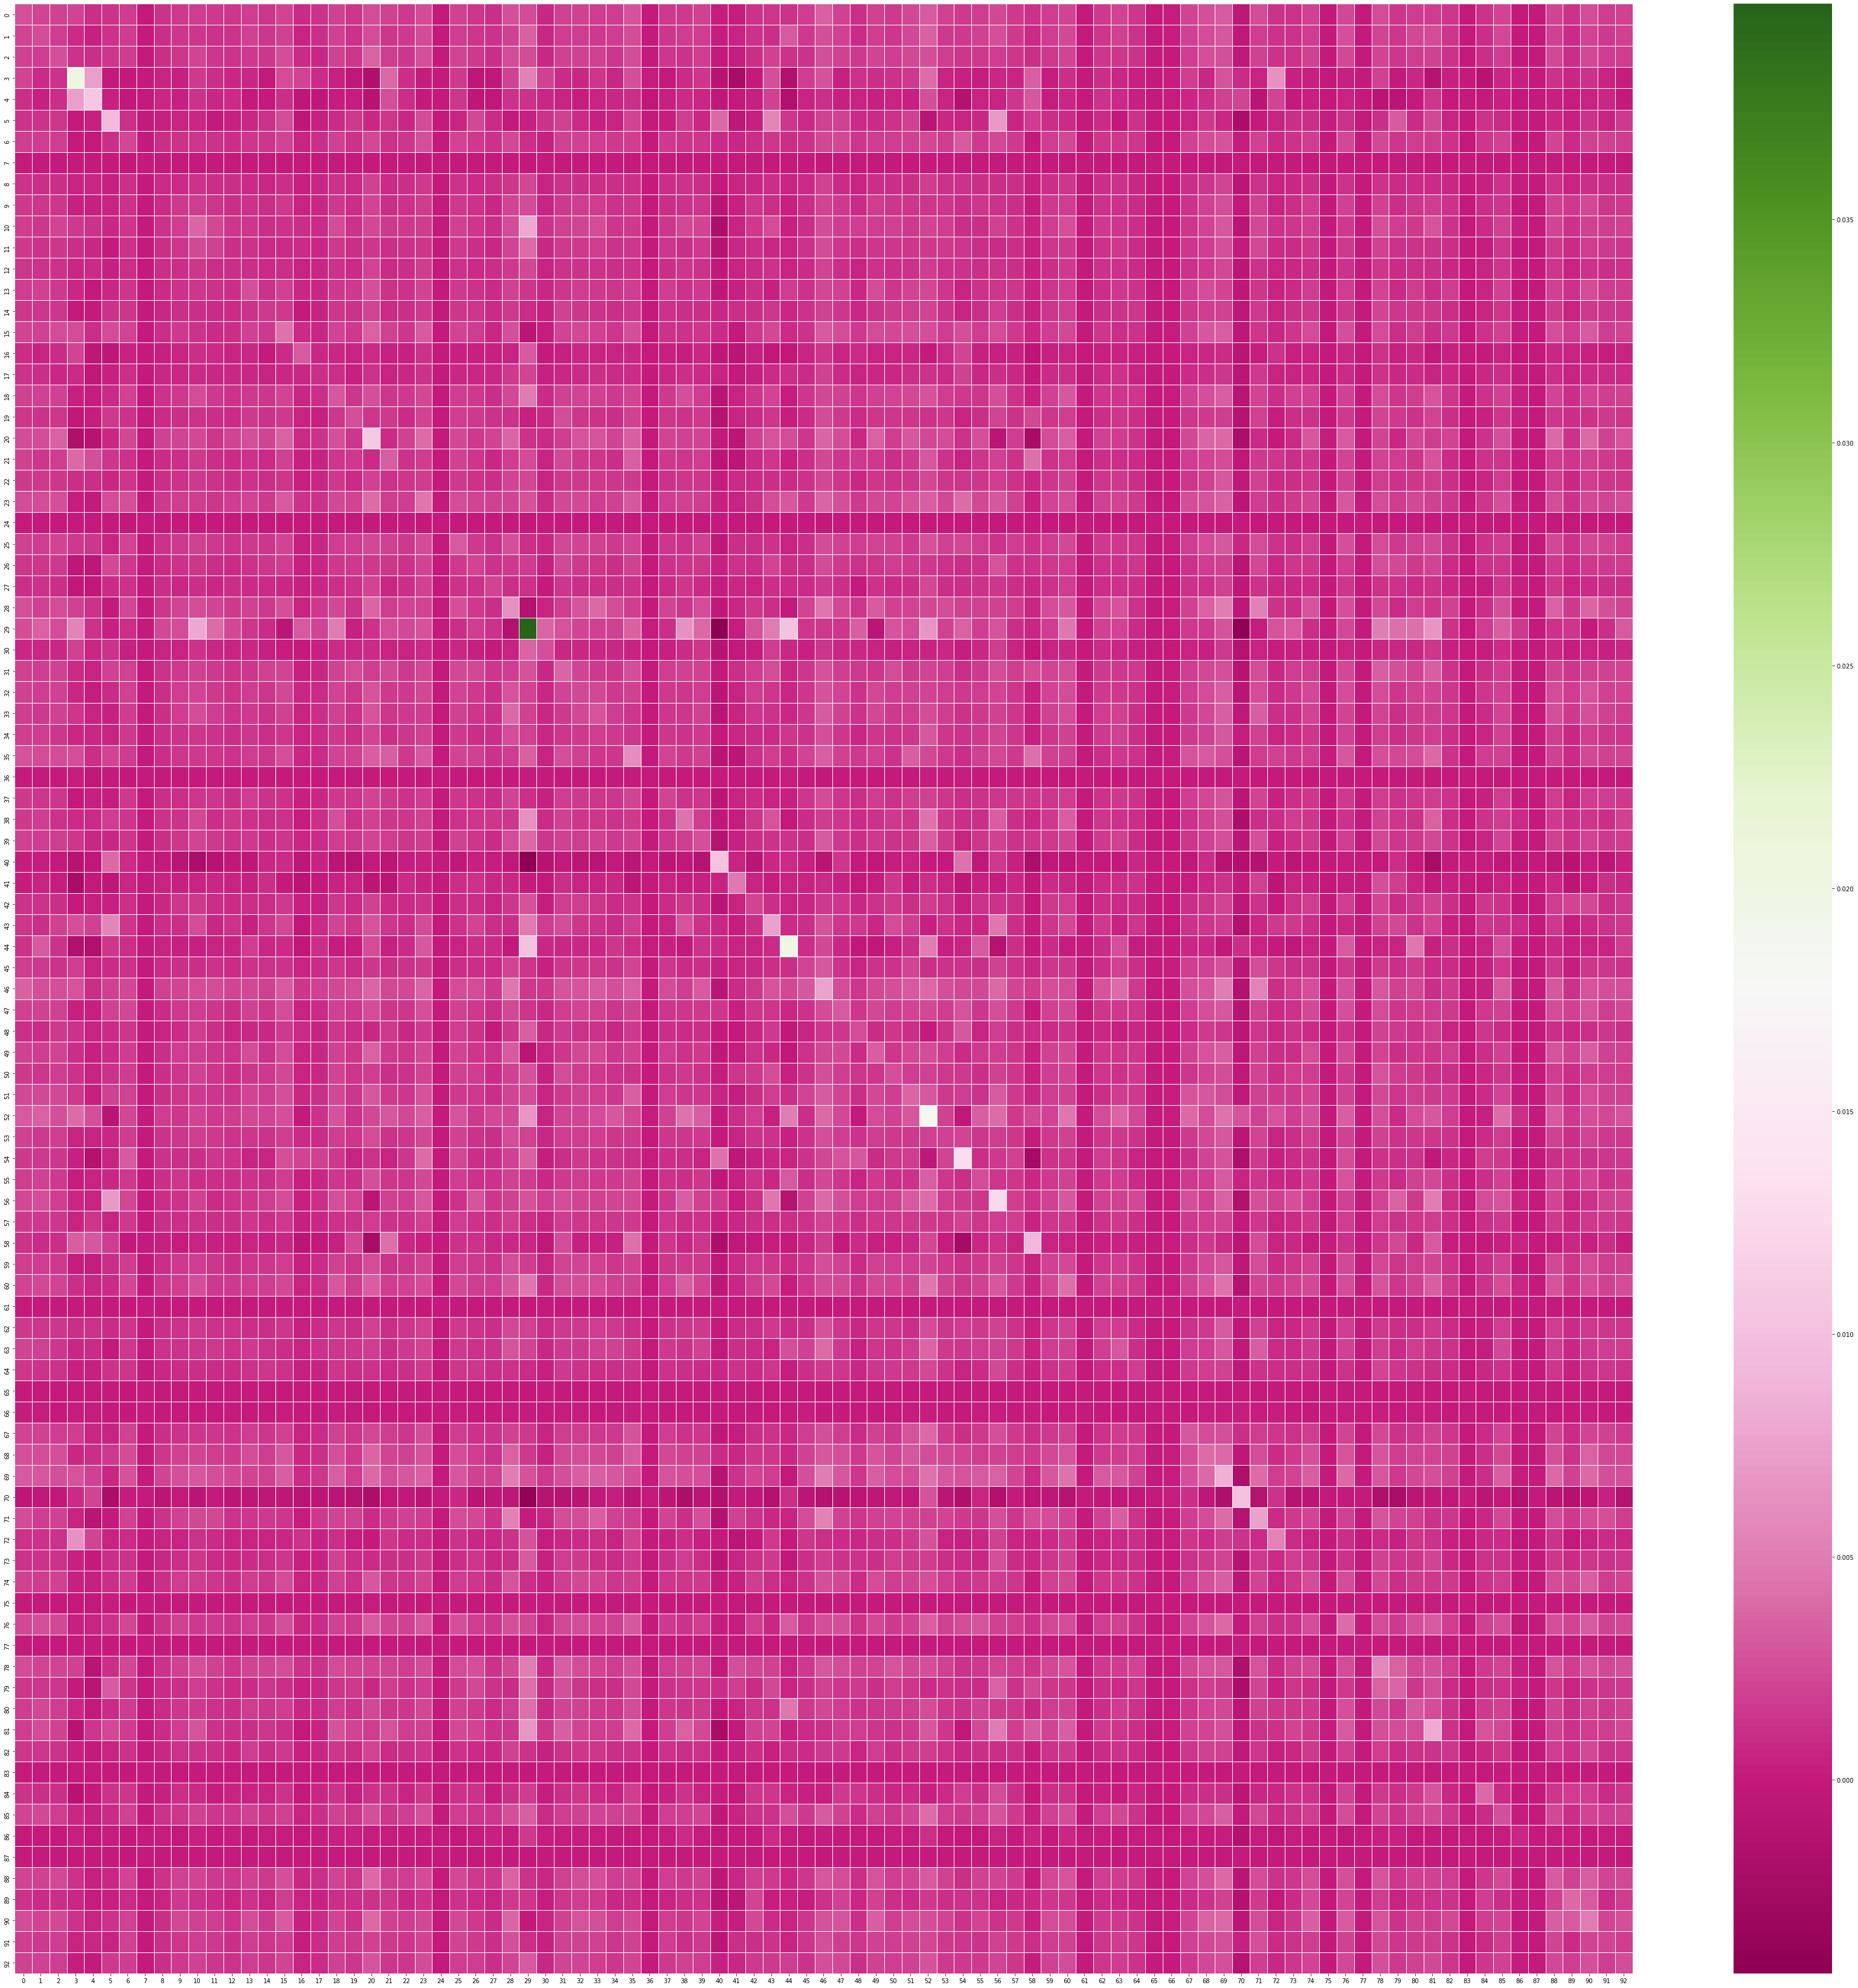

In [23]:
mu = np.mean(reldiff, axis=1)               # mean relative price change
sigma = np.cov(reldiff)                     # covariance (standard deviations)
std = np.std(reldiff, axis=1)               # standard deviation

plt.figure(figsize=(60,60))
ax = sns.heatmap(sigma, linewidth=0.5, cmap="PiYG")
plt.show()

In [24]:
# Create an empty model
m2 = gp.Model('portfolio')

# Add matrix variable for the cryptos
crypto_set = range(len(data2.columns))
x2 = m2.addVars(crypto_set, vtype=GRB.INTEGER, lb=0.0)

In [25]:
# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between cryptos
risk = sum(sum(sigma[i,j]*x2[i]*x2[j] for i in crypto_set) for j in crypto_set)

m2.setObjective(risk, GRB.MINIMIZE)

In [26]:
# total amount of cryptos purchased at the first day (open price on July 28, 2021) should be less than the budget
limit = 100
m2.addConstr( sum(openprice[i]*x2[i] for i in crypto_set) == limit)

# each kind of crypto purchased at the first day (open price on July 28, 2021)should be less than 30% 
for i in crypto_set:
    m2.addConstr(openprice[i] * x2[i] <= percentage * limit)

# domain constraints
for i in crypto_set:
    m2.addConstr(x2[i] >= 0.0)

# Optimize model to find the minimum risk portfolio
m2.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 187 rows, 93 columns and 279 nonzeros
Model fingerprint: 0x45238885
Model has 4371 quadratic objective terms
Variable types: 0 continuous, 93 integer (0 binary)
Coefficient statistics:
  Matrix range     [7e-06, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 1e+02]
Presolve removed 186 rows and 28 columns
Presolve time: 0.01s
Presolved: 1 rows, 65 columns, 65 nonzeros
Presolved model has 2145 quadratic objective terms
Variable types: 0 continuous, 65 integer (9 binary)
Found heuristic solution: objective 1.421020e+11

Root relaxation: objective 1.611437e-04, 37 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node

In [27]:
# the optimal value
print(m2.objVal)

0.00025900290092587095


In [28]:
# optimal investment plan 
for i in crypto_set:
    if x2[i].x != 0: 
        print(data2.columns[i], 'should buy: ', x2[i].x)

Binance USD should buy:  30.0
dai should buy:  9.0
Pax Dollar should buy:  1.0
tether should buy:  29.0
TrueUSD should buy:  9.000055083867107
usd coin should buy:  22.0


### Long-Term Optimization - To Produce Risk-Return frontier

In [29]:
# data processing to improve running time
selected_crypto = []
select_crypto_idx = [i for i in range(0,92,1)]

for i in select_crypto_idx:
    selected_crypto.append(list(data2.columns)[i])

data3 = data2[selected_crypto]
data3.head()

,1inch,Aave,Algorand,Arweave,avalanche,Axie Infinity,Basic Attention Token,Binance USD,Bitcoin BEP2,bitcoin cash,...,tron,TrueUSD,Trust Wallet Token,uniswap,unus sed leo,usd coin,VeChain,Waves,xrp,Zcash
0,2.182685,297.069275,0.842405,11.139919,12.28,45.687160,0.569564,0.999969,40051.33984,510.69,...,0.060688,1.000003,0.331340,19.012,3.1081,0.9998,0.082563,15.595103,0.73159,105.547165
1,2.240915,311.398132,0.845518,11.175811,12.43,44.219723,0.594311,1.000040,40060.56641,538.59,...,0.061843,0.999887,0.351122,19.580,2.7873,0.9999,0.082462,15.723205,0.74820,107.744377
2,2.310948,321.565247,0.852903,11.179028,12.97,43.332626,0.613559,0.999913,41979.03906,552.49,...,0.063204,1.000001,0.373153,20.908,3.0328,0.9995,0.085846,16.269573,0.75161,109.901627
3,2.383902,331.018280,0.841249,11.758539,13.51,42.660290,0.651608,0.999785,41645.85938,545.73,...,0.063921,0.999884,0.391750,21.746,3.0607,0.9994,0.089586,16.566219,0.74434,111.651459
4,2.326684,317.499359,0.814141,11.529578,12.86,37.948685,0.660009,1.000123,40050.28906,526.71,...,0.064058,0.999983,0.365532,22.007,3.1341,0.9999,0.085917,15.809540,0.72477,115.701927


In [30]:
# reset series index (or else there will be an error afterwards)
selected_open = openprice.iloc[select_crypto_idx]
selected_open = selected_open.reset_index()['Open']
selected_open

0       3.215089
1     372.994934
2       1.066114
3      38.536346
4      50.110000
         ...    
87      0.999400
88      0.128215
89     24.676373
90      1.191290
91    152.338318
Name: Open, Length: 92, dtype: float64

In [31]:
closes_m3 = np.transpose(np.array(data3))    # matrix of daily closing prices
absdiff_m3 = np.diff(closes_m3)           # change in closing price each day
reldiff_m3 = np.divide(absdiff_m3, closes_m3[:,:-1])

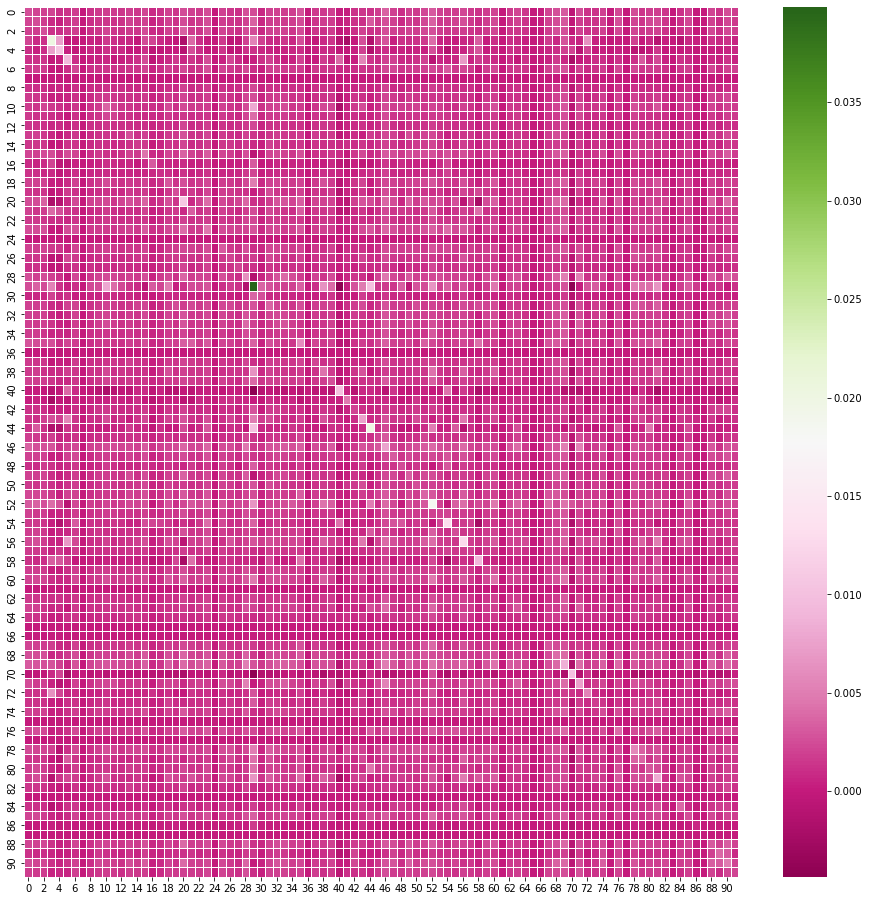

In [32]:
mu3 = np.mean(reldiff_m3, axis=1)               # mean relative price change
sigma3 = np.cov(reldiff_m3)                     # covariance (standard deviations)
std3 = np.std(reldiff_m3, axis=1)               # standard deviation

plt.figure(figsize=(16,16))
ax = sns.heatmap(sigma3, linewidth=0.5, cmap="PiYG")
plt.show()

In [33]:
# Create an empty model
m3 = gp.Model('model3')

# Add matrix variable for the cryptos
select_crypto_set = range(len(data3.columns))

In [34]:
x3 = m3.addVars(select_crypto_set, lb=0.0)

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between cryptos
risk = sum(sum(sigma3[i,j]*x3[i]*x3[j] for i in select_crypto_set) for j in select_crypto_set)

m3.setObjective(risk, GRB.MINIMIZE)

In [35]:
# total amount of cryptos purchased at the first day (open price on July 28, 2021) should be less than the budget
m3.addConstr(sum(selected_open[i]*x3[i] for i in select_crypto_set) == limit)

# each kind of crypto purchased at the first day (open price on July 28, 2021)should be less than 30% 
for i in select_crypto_set:
    m3.addConstr(selected_open[i] * x3[i] <= percentage * limit)

# domain constraints
for i in select_crypto_set:
    m3.addConstr(x3[i] >= 0.0)

m3.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 185 rows, 92 columns and 276 nonzeros
Model fingerprint: 0x6ac1338b
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [7e-06, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.02s
Presolved: 1 rows, 92 columns, 92 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.37833047e-01 -6.17279358e+08  4.10e+06 2.72e-01  9.96e+07     0s
   1

In [36]:
sol_volatility = sqrt(m3.objVal)
sol_return = sum(mu3[i] * x3[i].x for i in select_crypto_set)


pd.DataFrame(data = np.append([x3[i].x for i in select_crypto_set], [sol_volatility, sol_return]),
             index= selected_crypto + ['Volatility', 'Expected Return'],
             columns=['Minimum Risk Portfolio'])

# Create an expression representing the expected return for the portfolio
portfolio_return = sum(mu3[i] * x3[i] for i in select_crypto_set)

target = m3.addConstr(portfolio_return == 0)

# Solve for efficient frontier by varying target return
frontier = np.empty((2,0))
for r in np.linspace(mu3.min(), mu3.max(), 100):
    target.rhs = r
    m3.optimize()
    frontier = np.append(frontier, [[sqrt(m3.objVal)],[r]], axis=1)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0x751c20d3
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   9.80634887e-14 -7.16969995e+03  4.14e+04 1.92e-07  6.46e+05     0s
   

   2   7.53031431e+03 -1.53606928e+04  1.95e+02 1.37e-09  3.43e+03     0s
   3   1.53784025e+00 -7.32762028e+03  2.30e+00 1.61e-11  7.87e+01     0s
   4   6.03607149e-02 -1.55637970e+03  8.56e-02 7.96e-13  9.82e+00     0s
   5   8.40105404e-02 -9.28407349e+01  2.01e-03 6.54e-13  5.12e-01     0s
   6   8.33111815e-02 -1.40883468e+00  2.95e-05 1.05e-13  8.11e-03     0s
   7   2.79330718e-02 -1.51022330e-01  4.43e-08 2.86e-15  9.73e-04     0s
   8   5.34149634e-03 -6.27535158e-02  4.45e-14 3.19e-16  3.70e-04     0s
   9   9.91920093e-04 -3.26557287e-03  8.53e-16 1.25e-16  2.31e-05     0s
  10   4.12083876e-04 -7.84415814e-04  5.55e-17 4.16e-17  6.50e-06     0s
  11   9.39693311e-05 -1.62733289e-04  3.89e-16 6.94e-18  1.40e-06     0s
  12   1.40073940e-05 -3.16792540e-05  5.55e-17 2.20e-18  2.48e-07     0s
  13   3.43536470e-06 -3.86910410e-06  1.67e-16 7.77e-19  3.97e-08     0s
  14   1.65598669e-06 -1.63563196e-06  1.11e-16 4.34e-19  1.79e-08     0s
  15   8.81374897e-07  2.64186789e-07 

  16   7.48897994e-06  7.42670964e-06  2.78e-16 6.51e-19  3.38e-10     0s
  17   7.45316087e-06  7.45303548e-06  2.78e-16 4.34e-19  6.81e-13     0s

Barrier solved model in 17 iterations and 0.04 seconds (0.00 work units)
Optimal objective 7.45316087e-06

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0x38e4b361
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-03, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04

   2   8.11360396e+03 -1.63893224e+04  2.19e+02 1.62e-09  3.90e+03     0s
   3   1.50703770e+00 -7.82087192e+03  2.16e+00 1.60e-11  7.99e+01     0s
   4   6.73453370e-02 -1.64924364e+03  6.41e-02 4.75e-13  9.97e+00     0s
   5   7.26977021e-02 -5.49534938e+01  7.76e-04 2.81e-12  3.00e-01     0s
   6   6.92430715e-02 -1.53574240e+00  2.11e-05 1.15e-13  8.72e-03     0s
   7   2.07762857e-02 -1.85972834e-01  2.11e-11 1.48e-15  1.12e-03     0s
   8   2.87635150e-03 -5.89754725e-02  1.11e-16 2.22e-16  3.36e-04     0s
   9   1.99883421e-03 -1.58404814e-02  5.55e-17 1.11e-16  9.70e-05     0s
  10   7.69778393e-04 -3.39786136e-03  6.25e-17 3.47e-17  2.27e-05     0s
  11   2.05598646e-04 -3.29518841e-04  1.11e-16 8.54e-18  2.91e-06     0s
  12   8.31375975e-05 -8.46297946e-05  1.13e-17 2.60e-18  9.12e-07     0s
  13   4.32266615e-05  7.90470877e-06  5.55e-17 1.73e-18  1.92e-07     0s
  14   3.18661493e-05  2.53180596e-05  1.11e-16 6.28e-19  3.56e-08     0s
  15   2.91460323e-05  2.85430194e-05 


Barrier solved model in 17 iterations and 0.04 seconds (0.00 work units)
Optimal objective 5.41085764e-05

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0x53e87b17
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Pri

   4   7.95387548e-02 -2.08462069e+03  4.39e-02 7.96e-13  1.20e+01     0s
   5   7.61622929e-02 -4.13407429e+01  2.50e-04 7.67e-13  2.25e-01     0s
   6   6.87052690e-02 -1.57415594e+00  9.08e-06 4.66e-14  8.93e-03     0s
   7   2.31316724e-02 -1.82341924e-01  4.37e-08 1.18e-15  1.12e-03     0s
   8   7.25446521e-03 -3.32806378e-02  2.01e-09 1.29e-16  2.20e-04     0s
   9   2.41652438e-03 -7.76807794e-03  2.05e-15 3.16e-17  5.54e-05     0s
  10   7.53455598e-04 -1.29443004e-03  1.32e-16 2.08e-17  1.11e-05     0s
  11   2.87916128e-04 -2.16115438e-04  2.78e-16 6.71e-18  2.74e-06     0s
  12   1.53702371e-04  2.42414527e-05  1.11e-16 2.60e-18  7.04e-07     0s
  13   1.10938538e-04  8.75631980e-05  4.44e-16 2.65e-18  1.27e-07     0s
  14   1.01408038e-04  9.96960109e-05  3.33e-16 1.73e-18  9.30e-09     0s
  15   1.00530092e-04  1.00396165e-04  5.83e-17 1.73e-18  7.28e-10     0s
  16   1.00453338e-04  1.00450643e-04  2.22e-16 1.72e-18  1.46e-11     0s

Barrier solved model in 16 iterations

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0x2753e4c2
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-02, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.32755776e-13 -9.49156876e+03  4.14e+04 3.37e-07  7.28e+05     0s
   1   1.87552259e+05 -1.96869497e+05  3.97e+03 3.22e-08  

   5   7.87962866e-02 -3.77058505e+01  1.23e-04 1.56e-12  2.05e-01     0s
   6   7.19678586e-02 -1.58848707e+00  5.11e-06 3.57e-14  9.02e-03     0s
   7   2.50964828e-02 -1.61793147e-01  8.01e-08 2.26e-15  1.02e-03     0s
   8   1.05411098e-02 -3.72177326e-02  9.45e-09 2.78e-16  2.60e-04     0s
   9   3.42615649e-03 -1.01332439e-02  1.16e-10 4.12e-17  7.37e-05     0s
  10   1.12518175e-03 -2.66913718e-03  1.39e-16 1.56e-17  2.06e-05     0s
  11   5.00372258e-04 -2.09014024e-04  1.67e-16 6.79e-18  3.86e-06     0s
  12   2.99501142e-04  8.36396343e-05  6.94e-17 3.47e-18  1.17e-06     0s
  13   2.35553906e-04  1.91942277e-04  5.17e-16 3.47e-18  2.37e-07     0s
  14   2.18294221e-04  2.13225454e-04  2.50e-16 3.26e-18  2.75e-08     0s
  15   2.16073625e-04  2.15535987e-04  1.67e-16 2.60e-18  2.92e-09     0s
  16   2.15809605e-04  2.15809001e-04  1.04e-16 2.60e-18  3.28e-12     0s

Barrier solved model in 16 iterations and 0.04 seconds (0.00 work units)
Optimal objective 2.15809605e-04

Guro

Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-02, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.43961372e-13 -9.49156876e+03  4.14e+04 3.46e-07  7.28e+05     0s
   1   1.87555538e+05 -1.96893710e+05  3.97e+03 3.32e-08  7.22e+04     0s
   2   9.85691420e+03 -1.94433649e+04  2.57e+02 2.15e-09  4.86e+03     0s
   3   3.51911573e+00 -9.13763249e+03  2.67e+00 2.23e-11  9.87e+01     0s
   4   9.37495198e-02 -2.33844211e+03  4.98e-

  13   3.79745425e-04  3.72950397e-04  9.71e-17 3.47e-18  3.69e-08     0s
  14   3.75819401e-04  3.75476621e-04  8.88e-16 4.34e-18  1.86e-09     0s
  15   3.75626543e-04  3.75622753e-04  1.17e-15 3.47e-18  2.06e-11     0s

Barrier solved model in 15 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.75626543e-04

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0xe862a33e
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-02, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 

   3   6.76819212e+00 -9.23359256e+03  3.48e+00 2.90e-11  1.14e+02     0s
   4   9.82733890e-02 -2.67673522e+03  1.14e-01 9.47e-13  1.65e+01     0s
   5   7.57037248e-02 -1.05303464e+02  1.14e-07 7.39e-13  5.73e-01     0s
   6   7.27474275e-02 -1.10629563e+00  1.04e-09 1.13e-13  6.41e-03     0s
   7   1.94518944e-02 -2.22058954e-01  1.22e-15 1.11e-15  1.31e-03     0s
   8   1.15133303e-02 -2.72409339e-02  2.78e-16 2.08e-16  2.11e-04     0s
   9   3.73003811e-03 -7.59291907e-03  5.55e-17 2.08e-17  6.15e-05     0s
  10   1.33140740e-03 -8.46502270e-04  2.22e-16 6.94e-18  1.18e-05     0s
  11   7.02392626e-04  2.41413040e-04  3.89e-16 5.20e-18  2.51e-06     0s
  12   5.36934015e-04  4.24788137e-04  5.00e-16 3.69e-18  6.09e-07     0s
  13   4.91976212e-04  4.87090204e-04  2.78e-16 6.00e-18  2.66e-08     0s
  14   4.89331080e-04  4.89284944e-04  6.11e-16 5.20e-18  2.51e-10     0s
  15   4.89302294e-04  4.89300539e-04  4.91e-14 3.47e-18  9.54e-12     0s

Barrier solved model in 15 iterations

Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.17815388e-12 -1.16280916e+04  4.14e+04 6.15e-07  7.43e+05     0s
   1   1.78547657e+05 -1.89829343e+05  4.27e+03 6.34e-08  7.89e+04     0s
   2   4.74642365e+03 -1.63527436e+04  1.90e+02 2.82e-09  3.65e+03     0s
   3   3.06382239e+00 -1.03447198e+04  3.10e+00 4.61e-11  1.13e+02     0s
   4   1.69649996e-01 -2.68256796e+03  1.51e-01 2.24e-12  1.75e+01     0s
   5   1.03485918e-01 -1.78710580e+02  2.45e-04 2.16e-12  9.73e-01     0s
   6   1.01211540e-01 -9.97639587e-01  1.08e-06 1.79e-13  5.97e-03     0s
   7   3.07161949e-02 -1.69686111e-01  1.08e-12 9.47e-16  1.09e-03     0s
   8   9.42096761e-03 -1.54955456e-02  6.13e-14 

Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0xa5f8e912
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-02, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.27229118e-12 -1.23647809e+04  4.14e+04 6.34e-07  7.51e+05     0s
   1   1.68504094e+05 -1.80441577e+05  4.28e+03 6.55e-08  7.98e+04     0s
   2   4.23624493e+03 -1.65008055e+04  1.66e+02 2.55e-09  3.23

  14   9.19970206e-04  9.19969558e-04  2.24e-15 6.64e-18  3.52e-12     0s

Barrier solved model in 14 iterations and 0.04 seconds (0.00 work units)
Optimal objective 9.19970206e-04

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0x18a2d05d
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-02, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Obj

   8   8.70627519e-03 -2.41379344e-02  2.22e-16 8.41e-17  1.79e-04     0s
   9   2.99065695e-03 -1.53152729e-03  2.78e-16 2.70e-17  2.46e-05     0s
  10   1.58555728e-03  7.15966822e-04  2.50e-16 1.39e-17  4.73e-06     0s
  11   1.20608876e-03  1.02362814e-03  3.47e-16 7.46e-18  9.92e-07     0s
  12   1.12553177e-03  1.11954743e-03  3.89e-16 5.20e-18  3.25e-08     0s
  13   1.12155793e-03  1.12150216e-03  7.30e-15 7.47e-18  3.03e-10     0s
  14   1.12153310e-03  1.12153301e-03  8.97e-14 6.94e-18  4.48e-13     0s

Barrier solved model in 14 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.12153310e-03

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0x9ae613db
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range

   2   4.76886995e+03 -1.79380807e+04  1.66e+02 3.57e-09  3.30e+03     0s
   3   4.45366087e+00 -1.16586935e+04  3.02e+00 6.48e-11  1.20e+02     0s
   4   1.94097481e-01 -3.15140301e+03  1.62e-01 3.48e-12  2.04e+01     0s
   5   1.16230968e-01 -1.85184969e+02  1.62e-07 9.95e-13  1.01e+00     0s
   6   1.14620066e-01 -7.64890416e-01  5.67e-10 1.32e-13  4.78e-03     0s
   7   3.79623588e-02 -7.15150347e-02  7.61e-12 1.83e-15  5.95e-04     0s
   8   1.13862029e-02 -3.05188404e-02  2.60e-13 5.40e-17  2.28e-04     0s
   9   4.09188276e-03 -2.66727757e-03  1.43e-14 1.66e-17  3.67e-05     0s
  10   2.31029374e-03 -1.31542087e-03  1.39e-16 1.73e-17  1.97e-05     0s
  11   1.63611739e-03  8.87082100e-04  1.11e-16 6.94e-18  4.07e-06     0s
  12   1.39700273e-03  1.29153243e-03  5.55e-17 6.94e-18  5.73e-07     0s
  13   1.34782318e-03  1.34654708e-03  6.94e-16 5.59e-18  6.94e-09     0s
  14   1.34710478e-03  1.34704688e-03  2.36e-14 4.92e-18  3.15e-10     0s
  15   1.34707862e-03  1.34707409e-03 

  RHS range        [5e-02, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.41337604e-12 -1.34068532e+04  4.14e+04 8.96e-07  7.66e+05     0s
   1   1.70575557e+05 -1.83428954e+05  4.39e+03 9.50e-08  8.34e+04     0s
   2   4.76962819e+03 -1.79586127e+04  1.66e+02 3.60e-09  3.30e+03     0s
   3   4.52238260e+00 -1.16802835e+04  3.03e+00 6.55e-11  1.20e+02     0s
   4   2.02652675e-01 -3.17934283e+03  1.63e-01 3.53e-12  2.06e+01     0s
   5   1.21103063e-01 -1.88905772e+02  1.63e-07 1.14e-12  1.03e+00     0s
   6   1.19550582e-01 -6.83540246e-01  4.86e-10 7.95e-14 

Optimal objective 1.80130662e-03

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0x343c1ff3
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-02, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.44188849e-12 -1.34068532e+04  4.14

   9   4.46191617e-03 -1.67060047e-03  1.67e-16 3.00e-17  3.33e-05     0s
  10   2.87195689e-03  5.82761794e-04  3.05e-16 8.91e-18  1.24e-05     0s
  11   2.25103583e-03  1.93660179e-03  5.00e-16 7.65e-18  1.71e-06     0s
  12   2.10686573e-03  2.08462889e-03  1.14e-15 6.94e-18  1.21e-07     0s
  13   2.09552678e-03  2.09525989e-03  1.51e-15 6.94e-18  1.45e-09     0s
  14   2.09543327e-03  2.09541989e-03  1.57e-13 9.58e-18  7.27e-11     0s
  15   2.09543029e-03  2.09542924e-03  1.03e-12 6.94e-18  5.72e-12     0s

Barrier solved model in 15 iterations and 0.04 seconds (0.00 work units)
Optimal objective 2.09543029e-03

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0x60823ffb
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range

   0   3.49254794e-12 -1.34068532e+04  4.14e+04 9.20e-07  7.66e+05     0s
   1   1.70580392e+05 -1.83465957e+05  4.39e+03 9.75e-08  8.34e+04     0s
   2   4.77171395e+03 -1.80150713e+04  1.66e+02 3.69e-09  3.30e+03     0s
   3   4.71450303e+00 -1.17395896e+04  3.04e+00 6.75e-11  1.21e+02     0s
   4   2.28947981e-01 -3.25955726e+03  1.68e-01 3.73e-12  2.10e+01     0s
   5   1.36219020e-01 -2.01233201e+02  1.68e-07 9.09e-13  1.09e+00     0s
   6   1.34744486e-01 -5.27451692e-01  3.32e-10 1.38e-13  3.60e-03     0s
   7   3.44041064e-02 -5.42486696e-02  1.15e-11 4.72e-15  4.82e-04     0s
   8   1.03693186e-02 -3.38858855e-02  1.18e-16 5.75e-17  2.41e-04     0s
   9   4.69616737e-03 -4.15010684e-04  1.11e-16 2.97e-17  2.78e-05     0s
  10   3.00693488e-03  2.03350062e-03  2.00e-15 1.73e-17  5.29e-06     0s
  11   2.55425285e-03  2.23199852e-03  2.03e-15 6.94e-18  1.75e-06     0s
  12   2.42103215e-03  2.40909980e-03  5.55e-16 1.04e-17  6.48e-08     0s
  13   2.41469262e-03  2.41442460e-03 

  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.52193200e-12 -1.34068532e+04  4.14e+04 9.28e-07  7.66e+05     0s
   1   1.70582151e+05 -1.83479412e+05  4.39e+03 9.84e-08  8.34e+04     0s
   2   4.77247263e+03 -1.80356001e+04  1.66e+02 3.73e-09  3.30e+03     0s
   3   4.78550518e+00 -1.17611314e+04  3.04e+00 6.82e-11  1.21e+02     0s
   4   2.39285167e-01 -3.28720937e+03  1.70e-01 3.81e-12  2.12e+01     0s
   5   1.39508454e-01 -2.00456896e+02  1.70e-07 9.09e-13  1.09e


Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0x03396b4c
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.89212153e-12 -1.37681344e+04  4.14e+04 9.77e-07  7.74e+05     0s
  

  12   3.43369147e-03  3.41343576e-03  2.64e-16 1.07e-17  1.10e-07     0s
  13   3.42304608e-03  3.42296323e-03  1.09e-15 8.28e-18  4.50e-10     0s
  14   3.42301259e-03  3.42301251e-03  2.48e-14 3.70e-18  4.50e-13     0s

Barrier solved model in 14 iterations and 0.04 seconds (0.00 work units)
Optimal objective 3.42301259e-03

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0x30005f9e
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-07, 5e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-10, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-02, 1e+02]
Presolve removed 184 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 

   7   3.60759373e-02 -4.67205053e-02  3.42e-08 1.09e-14  4.50e-04     0s
   8   1.29448518e-02 -1.29388125e-02  3.42e-14 5.03e-17  1.41e-04     0s
   9   5.71589576e-03  2.04732488e-03  3.61e-16 1.83e-17  1.99e-05     0s
  10   4.32387901e-03  3.11073637e-03  7.77e-16 1.04e-17  6.59e-06     0s
  11   3.92276632e-03  3.71378281e-03  7.77e-16 1.88e-17  1.14e-06     0s
  12   3.84731995e-03  3.82785378e-03  5.00e-16 1.04e-17  1.06e-07     0s
  13   3.83761793e-03  3.83757726e-03  3.33e-16 6.94e-18  2.21e-10     0s
  14   3.83760352e-03  3.83760348e-03  1.27e-14 1.31e-17  2.23e-13     0s

Barrier solved model in 14 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.83760352e-03

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 186 rows, 92 columns and 368 nonzeros
Model fingerprint: 0x45a3bb81
Model has 4278 quadratic objective terms
Coefficient statistics:
  Matrix ran

   2   4.83820951e+03 -1.84934756e+04  1.67e+02 4.04e-09  3.37e+03     0s
   3   4.96409233e+00 -1.21427147e+04  2.99e+00 7.21e-11  1.23e+02     0s
   4   2.06088232e-01 -3.56574373e+03  1.77e-01 4.29e-12  2.32e+01     0s
   5   1.30064112e-01 -2.24627391e+02  4.69e-04 8.53e-13  1.22e+00     0s
   6   1.28729260e-01 -4.47304102e-01  6.03e-07 2.67e-13  3.13e-03     0s
   7   3.62961003e-02 -4.54768245e-02  3.19e-08 1.39e-14  4.44e-04     0s
   8   1.34188601e-02 -1.20758894e-02  3.20e-14 2.40e-17  1.39e-04     0s
   9   6.12793663e-03  2.72852081e-03  6.11e-16 2.22e-17  1.85e-05     0s
  10   4.73732039e-03  3.82342607e-03  4.44e-16 1.39e-17  4.97e-06     0s
  11   4.37010019e-03  4.15423496e-03  5.55e-16 1.08e-17  1.17e-06     0s
  12   4.29878262e-03  4.25856041e-03  1.05e-15 6.94e-18  2.19e-07     0s
  13   4.27792201e-03  4.27755008e-03  8.88e-16 8.36e-18  2.02e-09     0s
  14   4.27774345e-03  4.27774303e-03  2.28e-15 1.71e-17  2.29e-12     0s

Barrier solved model in 14 iterations

 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.00332903e-12 -1.37681344e+04  4.14e+04 1.01e-06  7.74e+05     0s
   1   1.83906034e+05 -1.97174585e+05  4.31e+03 1.05e-07  8.31e+04     0s
   2   4.83889673e+03 -1.85140988e+04  1.67e+02 4.07e-09  3.37e+03     0s
   3   5.03652227e+00 -1.21643507e+04  2.99e+00 7.28e-11  1.23e+02     0s
   4   2.15310459e-01 -3.59155317e+03  1.79e-01 4.36e-12  2.33e+01     0s
   5   1.36325271e-01 -2.26099294e+02  5.01e-04 1.82e-12  1.23e+00     0s
   6   1.34932376e-01 -4.37197959e-01  6.21e-07 1.95e-13  3.11e-03     0s
   7   3.72543693e-02 -4.50011147e-02  3.03e-08 9.54e-15  4.47e-04     0s
   8   1.39735716e-02 -1.12964224e-02  3.01e-14 4.64e-17  1.37e-04     0s
   9   6.60561256e-03  3.34309724e-03  5.55e-16 1.11e-17  1.77e-05     0s
  10   5.18687160e-03  4.38408047e-03  1.11e-15 1.73e-17  

Presolve time: 0.01s
Presolved: 2 rows, 92 columns, 184 nonzeros
Presolved model has 4278 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 30
 AA' NZ     : 4.960e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.03373630e-12 -1.37681344e+04  4.14e+04 1.02e-06  7.74e+05     0s
   1   1.83907904e+05 -1.97188085e+05  4.31e+03 1.06e-07  8.31e+04     0s
   2   4.83958405e+03 -1.85347211e+04  1.67e+02 4.11e-09  3.37e+03     0s
   3   5.10955242e+00 -1.21859738e+04  2.99e+00 7.35e-11  1.23e+02     0s
   4   2.24808233e-01 -3.61709189e+03  1.81e-01 4.43e-12  2.34e+01     0s
   5   1.42879389e-01 -2.27681102e+02  5.44e-04 1.48e-12  1.24e+00     0s
   6   1.41415008e-01 -4.28309845e-01  6.51e-07 1.82e-13  3.10e-03     0s
   7   3.64646041e-02 -4.26072821e-02  2.24e-08 6.30e-15 

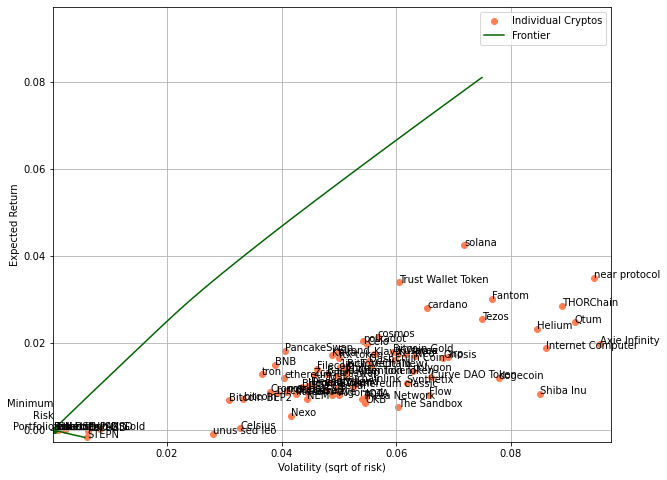

In [37]:
fig, ax = plt.subplots(figsize=(10,8))

# Plot volatility versus expected return for individual cryptos
ax.scatter(x=std3, y=mu3, color='Coral', label='Individual Cryptos')
for i, crypto in enumerate(list(data3.columns)):
    ax.annotate(crypto, (std3[i], mu3[i]))

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=sol_volatility, y=sol_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (sol_volatility, sol_return),
            horizontalalignment='right')

# Plot efficient frontier
ax.plot(frontier[0], frontier[1], label='Frontier', color='DarkGreen')

# Format and display the final plot
ax.axis([frontier[0].min() - 0.6*np.abs(frontier[0].min()), frontier[0].max()*1.3, mu3.min() - 0.6*np.abs(mu3.min()), mu3.max()*1.2])
ax.set_xlabel('Volatility (sqrt of risk)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.show()